#### Hannah M. Padgette
##### Mathematical & Computational Modeling of Infectious Diseases
##### D.B. Larremore
##### Homework 3 - due 19 March 2024

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Problem 1a**: Estimate $R_0$ by examining the period of exponential growth (Method 1, Week 9). Be sure to show your work and plots as relevant. In the process, look up the $95\%$ confidence interval associated with estimating a slope from data points, and use the slope's confidence interval to provide a confidence interval for your $R_0$ estimate.

In [3]:
data = pd.read_csv('all_weeks.csv') # reading in the data

In [4]:
newCases = data['New Cases'].to_numpy()
t = data['Week'].to_numpy()

# find the total number of cases; duration of infection is two weeks, so need to sum the num of cases for that week and the week prior
totCases = np.zeros(len(newCases))
totCases[0] = newCases[0] # in week 1, the total number of cases is equal to the number of new cases that week

for i in range(1,len(newCases)): totCases[i] = newCases[i]+newCases[i-1]

The slope of the best-fit line is: 0.46125.
The 95% confidence interval on the slope is: (0.434,0.488)
The calculated R_0 is: 1.769
The 95% confidence interval on R_0 is: (1.724,1.814)


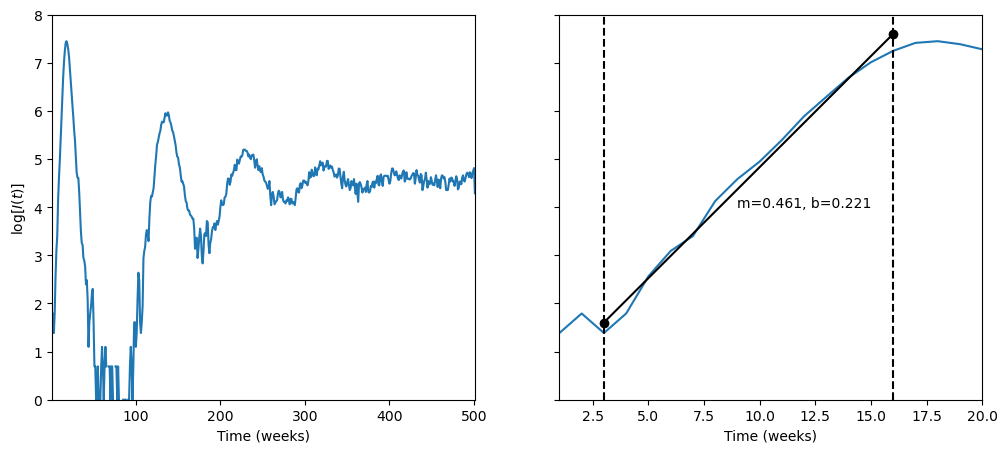

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey=True);

totCases[np.where(totCases==0)]=np.nan

ax[0].plot(t,np.log(totCases));
ax[0].set_xlim(np.min(t),np.max(t));
ax[0].set_ylim(0,8);
ax[0].set_xlabel('Time (weeks)');
ax[0].set_ylabel(r'$\log[I(t)]$');

ax[1].plot(t,np.log(totCases));
ax[1].set_xlim(np.min(t),20);
ax[1].set_xlabel('Time (weeks)');
ax[1].axvline(x=3,color='k', linestyle='--');
ax[1].axvline(x=16,color='k', linestyle='--');

x = data['Week'].to_numpy()
y = totCases
slope , intercept = stats.linregress(x[2:16],np.log(y[2:16])).slope , stats.linregress(x[2:16],np.log(y[2:16])).intercept
fitLine = x[2:16]*slope+intercept

ax[1].plot(x[2:16],fitLine,color='k');
ax[1].plot(x[2],fitLine[0],'ko');
ax[1].plot(x[15],fitLine[-1],'ko');
ax[1].text(9,4,f'm={slope:.3f}, b={intercept:.3f}');

plt.savefig("hw4_1a.png", bbox_inches="tight", dpi=300)

n=np.size(x[2:16])
alpha=0.05
tscore=stats.t.ppf(1-alpha/2,df=n-2)
sb1=stats.linregress(x[2:16],np.log(y[2:16])).stderr
b1=stats.linregress(x[2:16],np.log(y[2:16])).slope
UX = b1+tscore*sb1
LX = b1-tscore*sb1
print(f'The slope of the best-fit line is: {b1:.5f}.')
print(f'The 95% confidence interval on the slope is: ({LX:.3f},{UX:.3f})')

mu=1/10
gamma=1/2
R0=1+slope/(gamma+mu)
R0_UX = 1+UX/(gamma+mu)
R0_LX = 1+LX/(gamma+mu)
print(f'The calculated R_0 is: {R0:.3f}')
print(f'The 95% confidence interval on R_0 is: ({R0_LX:.3f},{R0_UX:.3f})')

**Problem 1b**: Estimate $R_0$ by utilizing the prevalence {\it or} seroprevalence data. (Method 2 or 4, Week 9). Be sure to show your work and plots as relevant. Write down (or look up) the 95\% confidence interval for the prevalence/seroprevalence estimate, and use it to provide a confidence interval for $R_0$.

In [13]:
# seroprevalence is the prevalence of antibodies for a pathogen in a population
n=1000
phat = 517/n
R_0 = 1/(1-phat)

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = phat+zscore*np.sqrt(phat*(1-phat)/n)
LX = phat-zscore*np.sqrt(phat*(1-phat)/n)

print(f'The proportion of the population which is seropositive is: {phat:.3f}')
print(f'The 95% confidence interval on the proportion of the population which is seropositive is: ({LX:.3f},{UX:.3f})')

R0_LX = 1/(1-LX)
R0_UX = 1/(1-UX)
print(f'The calculated R_0 is: {R_0:.3f}')
print(f'The 95% confidence interval on R_0 is: ({R0_LX:.3f},{R0_UX:.3f})') 

The proportion of the population which is seropositive is: 0.517
The 95% confidence interval on the proportion of the population which is seropositive is: (0.486,0.548)
The calculated R_0 is: 2.070
The 95% confidence interval on R_0 is: (1.946,2.212)


**Problem 1c**: (Grad / EC) Estimate $R_0$ a third way from the same data.

I_eq = 99.218
i_eq = 0.000992
The 95% confidence interval on i_eq is: (0.000797,0.001187)
The estimate for R_0 is: 1.053
The 95% confidence interval on R_0 is: (1.042,1.064)


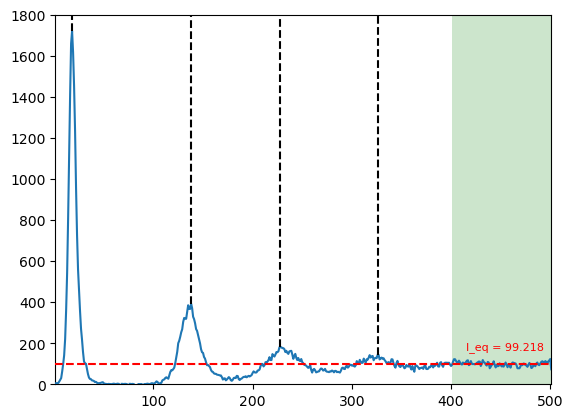

In [40]:
# using equilibrium prevalence to estimate R_0 a third way

fig, ax = plt.subplots();

ax.set_xlim(1,501)
ax.set_ylim(0,1800)

ax.fill_between(t, 1800, where=t>400, facecolor='green', alpha=.2,zorder=0)

ax.plot(t,totCases,zorder=3);

ax.axvline(x=t[np.nanargmax(totCases[0:100])], color='k', linestyle='--', ymin=np.nanmax(totCases[0:100])/1800, ymax=1, zorder=3);
ax.axvline(x=t[np.where(totCases==np.nanmax(totCases[100:200]))[0][0]], color='k', linestyle='--', ymin=np.nanmax(totCases[100:200])/1800, ymax=1, zorder=3);
ax.axvline(x=t[np.where(totCases==np.nanmax(totCases[200:300]))[0][0]], color='k', linestyle='--', ymin=np.nanmax(totCases[200:300])/1800, ymax=1, zorder=3);
ax.axvline(x=t[np.where(totCases==np.nanmax(totCases[300:400]))[0][0]], color='k', linestyle='--', ymin=np.nanmax(totCases[300:400])/1800, ymax=1, zorder=3);

ax.axhline(y=np.mean(totCases[399:-1]), color='r', linestyle='--', zorder=3)
ax.text(415,170,f'I_eq = {np.mean(totCases[399:-1]):.3f}', color='r', fontsize=8)

plt.savefig("hw4_1c.png", bbox_inches="tight", dpi=300)

print(f'I_eq = {np.mean(totCases[399:-1]):.3f}')
print(f'i_eq = {np.mean(totCases[399:-1])/100000:.6f}')

i_eq = np.mean(totCases[399:-1])/100000
gamma=1/2
mu=1/100

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = i_eq+zscore*np.sqrt(i_eq*(1-i_eq)/100000)
LX = i_eq-zscore*np.sqrt(i_eq*(1-i_eq)/100000)
print(f'The 95% confidence interval on i_eq is: ({LX:.6f},{UX:.6f})')

R_0 = 1/(1-i_eq*((gamma/mu)+1))
R0_UX = 1/(1-UX*((gamma/mu)+1))
R0_LX = 1/(1-LX*((gamma/mu)+1))
print(f'The estimate for R_0 is: {R_0:.3f}')
print(f'The 95% confidence interval on R_0 is: ({R0_LX:.3f},{R0_UX:.3f})') 

In [54]:
# ted turner study

n=1000
i_eq = 7/n
print(f'i_eq = {i_eq:.6f}')

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = i_eq+zscore*np.sqrt(i_eq*(1-i_eq)/n)
LX = i_eq-zscore*np.sqrt(i_eq*(1-i_eq)/n)
print(f'The 95% confidence interval on i_eq is: ({LX:.6f},{UX:.6f})')

gamma=1/2
mu=1/100
R_0 = 1/(1-i_eq*((gamma/mu)+1))

R0_UX = 1/(1-UX*((gamma/mu)+1))
R0_LX = 1/(1-LX*((gamma/mu)+1))
print(f'The estimate for R_0 is: {R_0:.3f}')
print(f'The 95% confidence interval on R_0 is: ({R0_LX:.3f},{R0_UX:.3f})') 

i_eq = 0.007000
The 95% confidence interval on i_eq is: (0.001833,0.012167)
The estimate for R_0 is: 1.555
The 95% confidence interval on R_0 is: (1.103,2.635)


**Problem 2a and 2b**: Maria Lara conducts a prevalence study with the above diagnostic. She samples 100 people and gets 39 positives. What is your estimate of the prevalence after correcting for the sensitivity and specificity? Write down a 95\% confidence interval for your corrected estimate.

In [55]:
n_pos = 39
n = 100
se = 0.90
sp = 0.98

phi_hat = n_pos/n
theta_hat = (phi_hat - (1-sp))/(se+sp-1)

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = phi_hat+zscore*np.sqrt(phi_hat*(1-phi_hat)/n)
LX = phi_hat-zscore*np.sqrt(phi_hat*(1-phi_hat)/n)

print(f'phiHat: {phi_hat:.3f}')
print(f'The 95% confidence interval on phiHat is: ({LX:.3f},{UX:.3f})')

thetaHat_UX = (UX - (1-sp))/(se+sp-1)
thetaHat_LX = (LX - (1-sp))/(se+sp-1)

print(f'thetaHat = {theta_hat: .3f}')
print(f'The 95% confidence interval on thetaHat is: ({thetaHat_LX:.3f},{thetaHat_UX:.3f})')
print(f'thetaHat 95% confidence interval width: {(thetaHat_UX-thetaHat_LX):.3f}')

phiHat: 0.390
The 95% confidence interval on phiHat is: (0.294,0.486)
thetaHat =  0.420
The 95% confidence interval on thetaHat is: (0.312,0.529)
thetaHat 95% confidence interval width: 0.217


**Problem 2c**: Trying to be helpful, Burt Q. Losis conducts a second prevalence study in the same population and finds 18 positives out of 50 samples. Again estimate the prevalence and a 95\% confidence interval.

In [56]:
n_pos = 18
n = 50
se = 0.90
sp = 0.98

phi_hat = n_pos/n
theta_hat = (phi_hat - (1-sp))/(se+sp-1)

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = phi_hat+zscore*np.sqrt(phi_hat*(1-phi_hat)/n)
LX = phi_hat-zscore*np.sqrt(phi_hat*(1-phi_hat)/n)

print(f'phiHat: {phi_hat:.3f}')
print(f'The 95% confidence interval on phiHat is: ({LX:.3f},{UX:.3f})')

thetaHat_UX = (UX - (1-sp))/(se+sp-1)
thetaHat_LX = (LX - (1-sp))/(se+sp-1)

print(f'thetaHat = {theta_hat: .3f}')
print(f'The 95% confidence interval on thetaHat is: ({thetaHat_LX:.3f},{thetaHat_UX:.3f})')
print(f'thetaHat 95% confidence interval width: {(thetaHat_UX-thetaHat_LX):.3f}')

phiHat: 0.360
The 95% confidence interval on phiHat is: (0.227,0.493)
thetaHat =  0.386
The 95% confidence interval on thetaHat is: (0.235,0.538)
thetaHat 95% confidence interval width: 0.302


**Problem 2d**: Pool Burt's and Maria's data to get a third estimate of prevalence, and update your 95\% confidence interval. How are your three estimates related? And, how are the widths of the three confidence intervals related?

In [57]:
n_pos = 18+39
n = 50+100
se = 0.90
sp = 0.98

phi_hat = n_pos/n
theta_hat = (phi_hat - (1-sp))/(se+sp-1)

alpha=0.05
zscore = stats.norm.ppf(1-alpha/2)
UX = phi_hat+zscore*np.sqrt(phi_hat*(1-phi_hat)/n)
LX = phi_hat-zscore*np.sqrt(phi_hat*(1-phi_hat)/n)

print(f'phiHat: {phi_hat:.3f}')
print(f'The 95% confidence interval on phiHat is: ({LX:.3f},{UX:.3f})')

thetaHat_UX = (UX - (1-sp))/(se+sp-1)
thetaHat_LX = (LX - (1-sp))/(se+sp-1)

print(f'thetaHat = {theta_hat: .3f}')
print(f'The 95% confidence interval on thetaHat is: ({thetaHat_LX:.3f},{thetaHat_UX:.3f})')
print(f'thetaHat 95% confidence interval width: {(thetaHat_UX-thetaHat_LX):.3f}')

phiHat: 0.380
The 95% confidence interval on phiHat is: (0.302,0.458)
thetaHat =  0.409
The 95% confidence interval on thetaHat is: (0.321,0.497)
thetaHat 95% confidence interval width: 0.177


**Problem 2e**: (Grad / EC) You test yourself. Positive! What is your best guess of the probability that you are *actually* positive?

In [58]:
se = 0.90
sp = 0.98

theta = theta_hat
prob = se*theta/(se*theta+(1-sp)*(1-theta))
print(f'The probability that you are truly positive given that you tested positive is: {prob:.3f}')

The probability that you are truly positive given that you tested positive is: 0.969


**Problem 3a**: Read in the data and produce a tall, skinny plot with three columns of data: the negative controls (red), the positive controls (black), and the data from the field (blue). Use jitter and transparency (`alpha') to allow us to see the distributions of the data. 

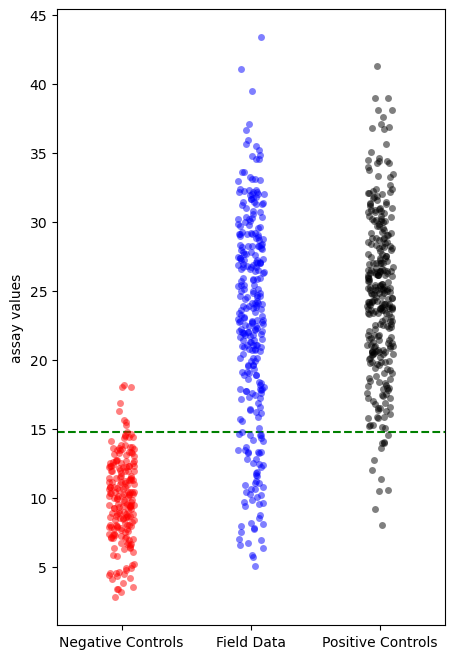

In [67]:
fig, ax = plt.subplots(figsize=(5,8));

data = pd.read_csv('HW4_Q3_data.csv',header=None).to_numpy().ravel();
neg = pd.read_csv('HW4_Q3_neg.csv',header=None).to_numpy().ravel();
pos = pd.read_csv('HW4_Q3_pos.csv',header=None).to_numpy().ravel();

sns.stripplot(y=neg, x=-1, color='r', label='neg', alpha=0.5,zorder=3);
sns.stripplot(y=data, x=0, color='b', label='data', alpha=0.5,zorder=3);
sns.stripplot(y=pos, x=1, color='k', label='pos', alpha=0.5,zorder=3);
ax.axhline(y=14.80, color='g', linestyle='--',zorder=0)

ax.set_xticks([0,1,2])
ax.set_xticklabels(['Negative Controls', 'Field Data', 'Positive Controls']);
ax.set_xlim(-0.5,2.5)
plt.legend([],[], frameon=False);
ax.set_ylabel('assay values')

plt.savefig("hw4_3a.png", bbox_inches="tight", dpi=300)

**Problem 3b** Consider a cutoff $c$ such that any assay values above $c$ are to be called positive and any assay values below $c$ are to be called negative. Then write four functions: $se(c)$, $sp(c)$, and $\hat{\phi}(c)$ and $\hat{\theta}(c)$. They should correspond to the sensitivity, the specificity, the raw prevalence in the field data, and the corrected prevalence in the field data. What value of $c$ corresponds to the ``Youden'' choice?

In [61]:
def se(c,pos=pos):
    # sensitivity, se is 1-the probability of a false negative
    # number of false negatives is the number of positive tests with a value < c
    return 1-(np.sum(pos<=c)/np.size(pos))

def sp(c,neg=neg):
    return 1-(np.sum(neg>=c)/np.size(neg))

def phi(c,data=data): # raw prevalence in the field data
    return np.sum(data>c)/np.size(data)

def theta(c): # corrected prevalence in the field data
    
    if (se(c)+sp(c))==1:
        return np.nan
    else:
        return (phi(c)-(1-sp(c)))/(se(c)+sp(c)-1)
    
def youden(c): 
    return se(c) + sp(c) - 1

In [63]:
n=1000
c=np.linspace(0.1,45,n)

sps = np.zeros((n,))
ses = np.zeros((n,))
Js = np.zeros((n,))

for i in range(0,len(c)):
    sps[i] = sp(c[i])
    ses[i] = se(c[i])
    Js[i] = se(c[i])+sp(c[i])-1

print(f'Youden choice: c = {c[np.argmax(Js)]:.2f}')

Youden choice: c = 14.80


**Problem 3c**: (Grad / EC) By sweeping over various choices of $c$, plot a receiver operator curve, and place a point at the Youden choice. Create a second plot showing how $\hat{\theta}(c)$ varies, and again, place a point at the Youden choice. 

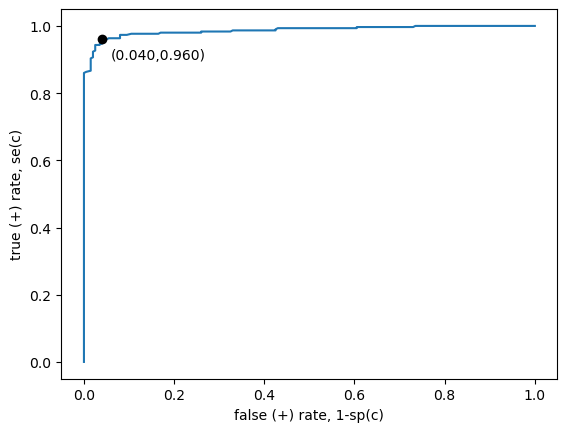

In [93]:
n=1000
c=np.linspace(0.1,45,n)

sps = np.zeros((n,))
ses = np.zeros((n,))
phis = np.zeros((n,))
thetas = np.zeros((n,))

youdens = np.zeros((n,))

for i in range(0,len(c)):
    sps[i] = sp(c[i])
    ses[i] = se(c[i])
    youdens[i] = se(c[i])+sp(c[i])-1
    phis[i] = phi(c[i])
    thetas[i] = theta(c[i])
    
c_youden = c[np.argmax(youdens)]     

fig, ax = plt.subplots();
ax.plot(1-sps,ses)
ax.plot(1-sp(c_youden),se(c_youden),'ko')
ax.text(1-sp(c_youden)+0.02,se(c_youden)-0.06,f'({(1-sp(c_youden)):.3f},{se(c_youden):.3f})')
ax.set_xlabel('false (+) rate, 1-sp(c)')
ax.set_ylabel('true (+) rate, se(c)')
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

plt.savefig("hw4_3c-1.png", bbox_inches="tight", dpi=300)

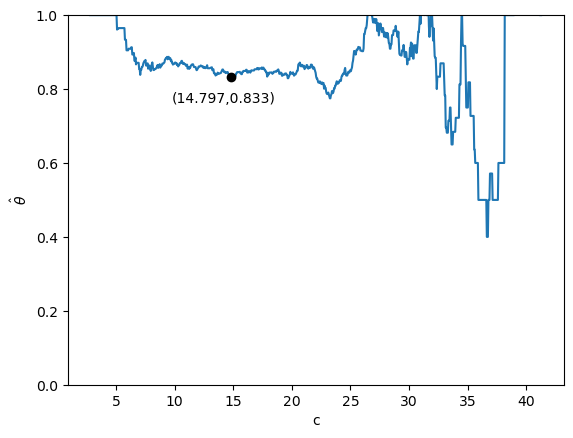

In [94]:
fig, ax = plt.subplots();

ax.plot(c,thetas)
ax.set_ylim(0,1)
ax.set_xlabel('c')
ax.set_ylabel(r'$\hat{\theta}$')

ax.plot(c_youden,thetas[np.argmax(youdens)],'ko')
ax.text(c_youden-5,thetas[np.argmax(youdens)]-.07,f'({c_youden:.3f},{thetas[np.argmax(youdens)]:.3f})')
plt.savefig("hw4_3c-2.png", bbox_inches="tight", dpi=300)